Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.


Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exploration.
Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
Use SQLAlchemy create_engine to connect to your sqlite database.
Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pandas as pd
import matplotlib
import numpy as np
from sqlalchemy import func


import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
Base = automap_base()

In [5]:
Base.prepare(engine, reflect=True)

In [ ]:
Base.classes.keys()

In [6]:
Station = Base.classes.Station

In [ ]:
Station.__dict__

In [7]:
Measurement = Base.classes.Measurement

In [8]:
session = Session(engine)

Precipitation Analysis


Design a query to retrieve the last 12 months of precipitation data.
Select only the date and prcp values.
Load the query results into a Pandas DataFrame and set the index to the date column.
Plot the results using the DataFrame plot method.

In [9]:
session.query(Measurement.date,Measurement.prcp).order_by(Measurement.date.desc()).first()

('2017-08-23', 0.0)

In [10]:
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>'2016-08-23')\
                                                        .order_by(Measurement.date).all()
results

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 0.0),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('20

In [11]:
data_df = pd.DataFrame(results, columns=['date','prcp'])

In [12]:
data_df.set_index('date', inplace=True, )

In [13]:
data_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22


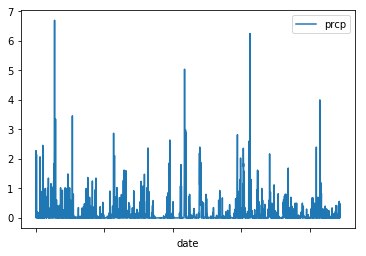

In [14]:
data_df.plot()
#plt.xticks(np.arange(9), ('2016-08-29', '2017-05-06', '2017-01-21', '2016-11-07', '2016-09-14'\
#                         ,'2016-11-19','2017-08-23','2017-05-05','2017-02-01'),rotation = 45)
#plt.show()

Station Analysis


Design a query to calculate the total number of stations.

Design a query to find the most active stations.


List the stations and observation counts in descending order
Which station has the highest number of observations?



Design a query to retrieve the last 12 months of temperature observation data (tobs).


Filter by the station with the highest number of observations.
Plot the results as a histogram with bins=12.

In [13]:
#Design a query to calculate the total number of stations.
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [14]:
#Design a query to find the most active stations.
# List the stations and observation counts in descending order

session.query(Measurement.station,func.count(Measurement.date)).group_by(Measurement.station)\
                                    .order_by(func.count(Measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Which station has the highest number of observations?
session.query(Measurement.station,func.count(Measurement.date)).group_by(Measurement.station)\
                .order_by(func.count(Measurement.date).desc()).first()

('USC00519281', 2772)

In [16]:
#checking for most recent date in database to determine year
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [17]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.
weather_query = session.query(Measurement.date,Measurement.tobs)\
                        .filter(Measurement.station == 'USC00519281')\
                        .filter(Measurement.date>'2016-08-23').all()
weather_db = pd.DataFrame(weather_query,columns=['date','tobs'])
weather_db.set_index('date', inplace=True, )

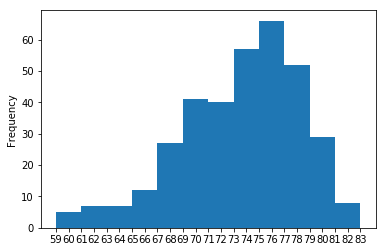

In [19]:
#Plot the results as a histogram with bins=12.
plt.hist(weather_db,bins =12)
plt.ylabel('Frequency');

Temperature Analysis


Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

Plot the min, avg, and max temperature from your previous query as a bar chart.


Use the average temperature as the bar height.
Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [20]:
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and 
#return the minimum, average, and maximum temperatures for that range of dates.
#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using 
#the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")


def calc_temps(start_date='2016-08-23',end_date = '2017-08-23'):
    results = session.query(Measurement.tobs)\
                        .filter(Measurement.date<end_date)\
                        .filter(Measurement.date>start_date)\
                        .order_by(Measurement.tobs.desc()).all()
    
    min_temp = results[-1][0]
    avg_temp = np.mean(results)
    max_temp = results[0][0]
    
    return(min_temp,avg_temp,max_temp)
    

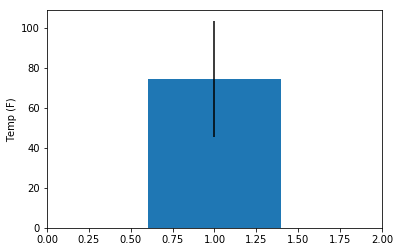

In [21]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.


# Use the average temperature as the bar height.
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).


min_temp, avg_temp, max_temp = calc_temps('2016-08-23','2017-08-23')

plt.bar(1,avg_temp,yerr=(max_temp - min_temp))
plt.xlim(0,2);
plt.ylabel('Temp (F)');